# 1. Download and Load Kaggle Dataset

In [2]:
import kagglehub
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("vagifa/ethereum-frauddetection-dataset")
print("Path to dataset files:", path)

# Load the CSV (adjust file name if needed)
df = pd.read_csv(f"{path}/transaction_dataset.csv")
print(df.head())

Path to dataset files: /kaggle/input/ethereum-frauddetection-dataset
   Unnamed: 0  Index                                     Address  FLAG  \
0           0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1           1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2           2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3           3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4           4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   

   Avg min between sent tnx  Avg min between received tnx  \
0                    844.26                       1093.71   
1                  12709.07                       2958.44   
2                 246194.54                       2434.02   
3                  10219.60                      15785.09   
4                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       

# 2. Explopratory Data Analysis
In this phase, we will try to explore our dataset, remove outliers or duplicates if exist. In addition to that we will make some visualizations to understand more the incorporated relationships between the main features and its variance. 📊📈📉

## Data Preprocessing

In [3]:
print("Shape of the dataset:")
df.shape
print("Dataset Columns:")
df.columns

Shape of the dataset:
Dataset Columns:


Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [4]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                         

In [6]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [7]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
Unnamed: 0,0
Index,0
Address,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0


In [8]:
print("Duplicated Values: ")
df.duplicated().sum()

Duplicated Values: 


np.int64(0)

##Data Visualization

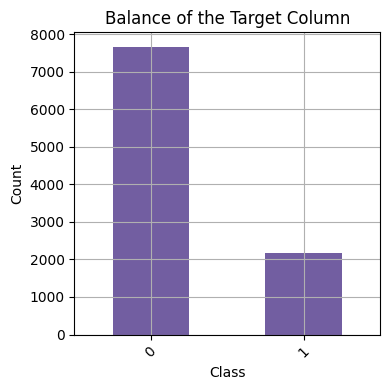

In [9]:
import matplotlib.pyplot as plt

# Check the balance of the target class (0 = Non-Fraud, 1 = Fraud )
df['FLAG'].value_counts().plot(kind='bar',
                                figsize=(4, 4),
                                title='Balance of the Target Column',
                                xlabel='Class',
                                ylabel='Count',
                                rot=45,
                                grid=True,
                                alpha=0.7,
                                color='#371A79')
plt.tight_layout()
plt.show()

Columns included in correlation:
Index(['Unnamed: 0', 'Index', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent 

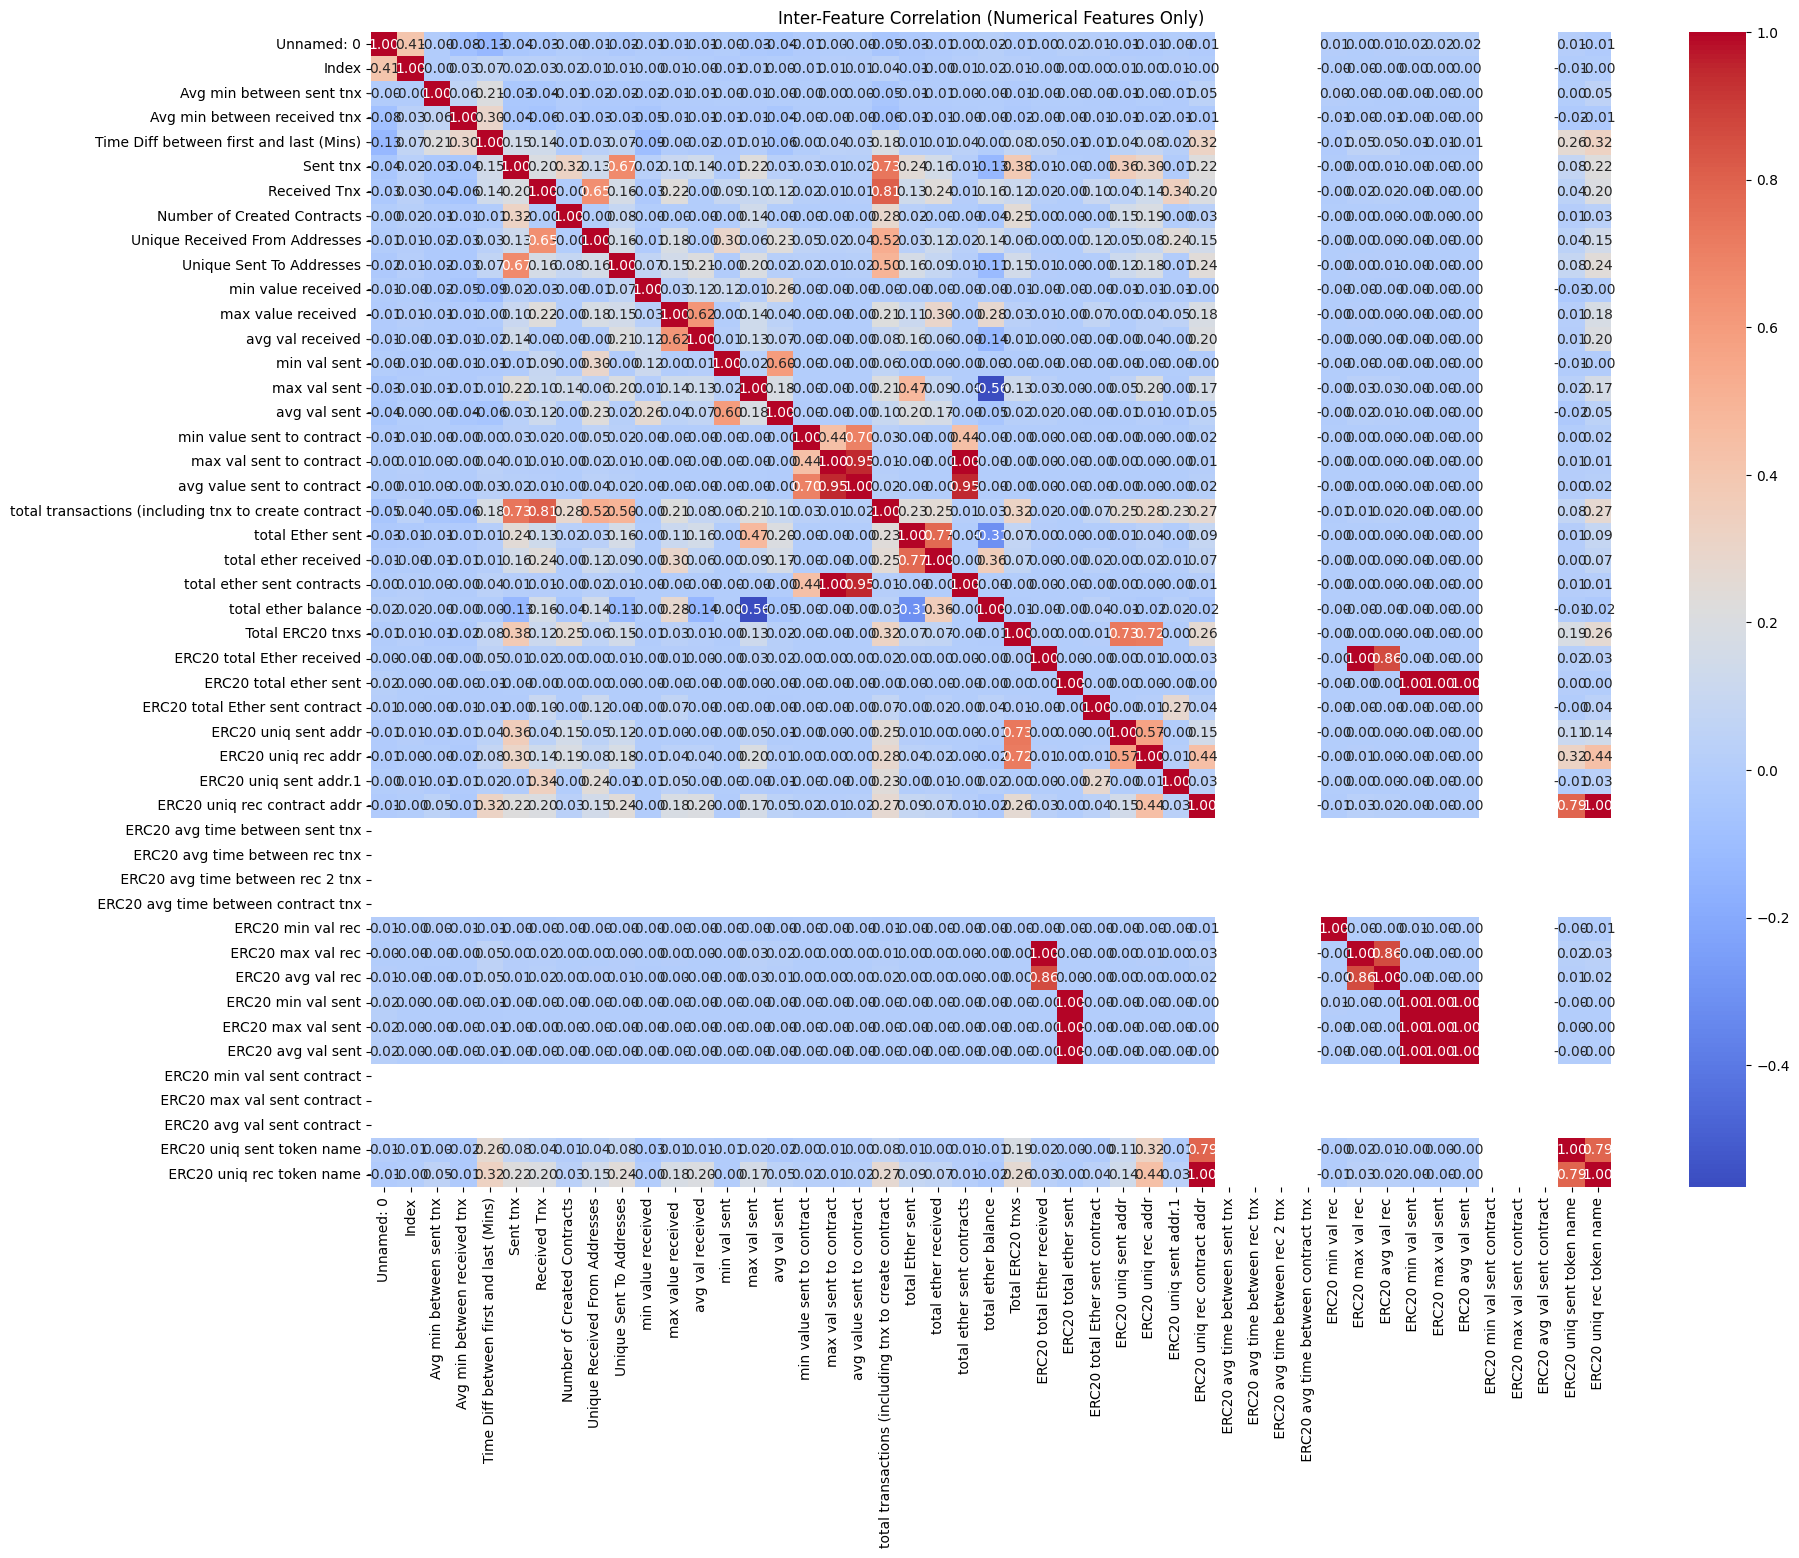

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

# Drop the 'FLAG' column as you intended for the features
features = df.drop(columns=['FLAG'])
numerical_features = features.select_dtypes(include=np.number)
numerical_features = numerical_features.dropna()

print("Columns included in correlation:")
print(numerical_features.columns)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Inter-Feature Correlation (Numerical Features Only)')
plt.show()
plt.close()

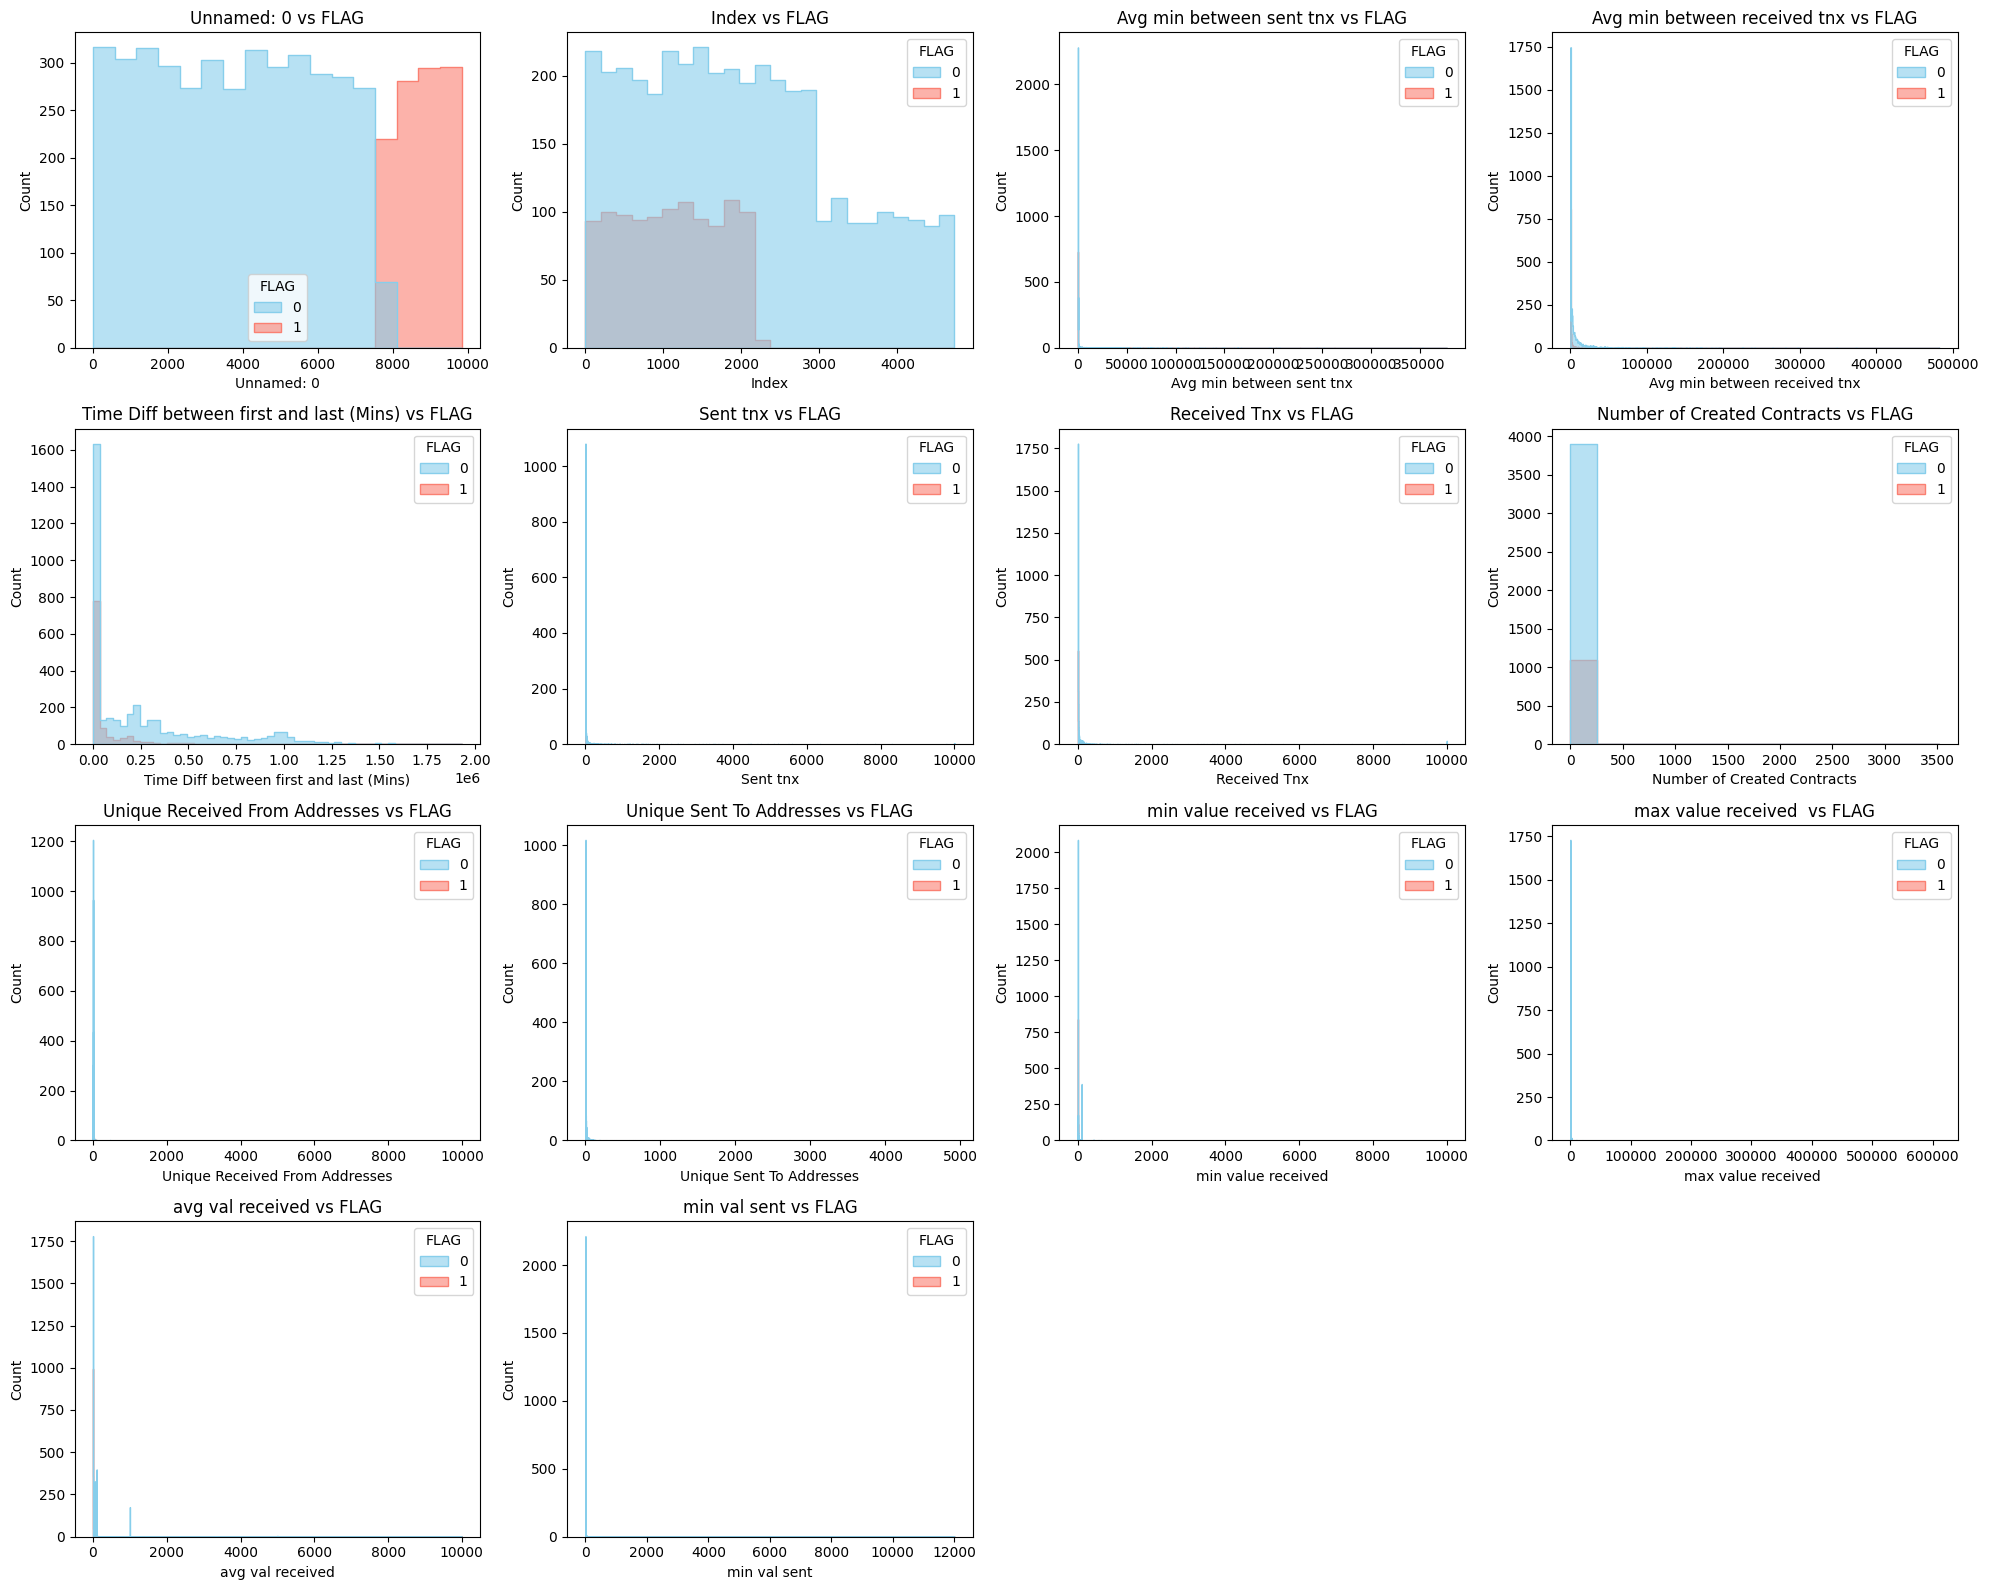

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional: downsample to reduce memory usage
df_sampled = df.sample(n=5000, random_state=42)

# Drop the 'FLAG' column for feature selection
features = df_sampled.drop(columns=['FLAG'])

# Select only numerical features
numerical_features = features.select_dtypes(include=np.number)

# Get a subset of numerical columns (limit to avoid memory crash)
plot_columns = numerical_features.columns[:14]

# Number of plots
num_columns = len(plot_columns)
n_cols = 4
n_rows = (num_columns + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Define colors for class hue
colors = ['skyblue', 'salmon']

# Plot histograms for each selected column
for idx, col in enumerate(plot_columns):
    sns.histplot(data=df_sampled, x=col, hue='FLAG', ax=axes[idx],
                 palette=colors, element='step', alpha=0.6, common_norm=False)
    axes[idx].set_title(f'{col} vs FLAG')

# Hide unused axes
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.close()  # Free memory


## Data Processing

In [12]:
# 1. Clean column names
df.columns = df.columns.str.strip()

In [13]:

# 2. Handle missing values
missing = df.isnull().sum()
# Drop columns with excessive missing values if needed
# For others, impute:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-13-3b4f0eaf84b6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-13-3b4f0eaf84b6>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [14]:
# 3. Remove duplicates
df.drop_duplicates(inplace=True)

In [15]:

# 4. Outlier detection
for col in df.select_dtypes(include=['float64', 'int64']):
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)

<ipython-input-15-6bb5e7f85e95>:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(upper=upper)
<ipython-input-15-6bb5e7f85e95>:4: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(upper=upper)


### Feature Engineering

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

def preprocess_data(df):
    # Remove non-numeric columns for ML
    non_numeric = ['hash', 'nonce', 'blockHash', 'from', 'to', 'input', 'contractAddress', 'cumulativeGasUsed', 'blockNumber', 'timeStamp', 'transactionIndex']
    for col in non_numeric:
        if col in df.columns:
            df = df.drop(columns=[col])
    # Convert timestamp first for features
    if 'timeStamp' in df.columns:
        df['timestamp'] = df['timeStamp'].apply(lambda x: datetime.fromtimestamp(int(x)))
    else:
        df['timestamp'] = pd.to_datetime('now')

    X = df.drop(columns=['FLAG'])
    y = df['FLAG']
    return X, y

X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Data Balanacing

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
resample_pipeline = Pipeline([
    ('o', over),
    ('u', under)
])
X_train_res, y_train_res = resample_pipeline.fit_resample(X_train, y_train)


ValueError: could not convert string to float: '0x7ff05442651fc3daa6d6a06f64cba30cad7b68b9'

#3. Machine Learning Models

In [ ]:
!pip install pandas numpy requests scikit-learn imbalanced-learn xgboost tensorflow shap lime matplotlib imblearn

## 1. XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y_train_res) - sum(y_train_res)) / sum(y_train_res)
)
xgb_model.fit(X_train_scaled, y_train_res)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

## 2. LSTM Model (requires 3D input)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

def create_sequences(X, y, sequence_length=10):
    sequences, labels = [], []
    for i in range(len(X) - sequence_length):
        seq = X.iloc[i:i+sequence_length].values
        label = y.iloc[i+sequence_length-1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X_sequences, y_sequences = create_sequences(X, y)
X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, random_state=42, stratify=y_sequences
)
X_seq_train_2d = X_seq_train.reshape(X_seq_train.shape[0], -1)
X_seq_train_res, y_seq_train_res = resample_pipeline.fit_resample(X_seq_train_2d, y_seq_train)
X_seq_train_res = X_seq_train_res.reshape(-1, X_seq_train.shape[1], X_seq_train.shape[2])

seq_scaler = StandardScaler()
X_seq_train_res_flat = X_seq_train_res.reshape(-1, X_seq_train_res.shape[2])
X_seq_train_scaled = seq_scaler.fit_transform(X_seq_train_res_flat).reshape(X_seq_train_res.shape)
X_seq_test_flat = X_seq_test.reshape(-1, X_seq_test.shape[2])
X_seq_test_scaled = seq_scaler.transform(X_seq_test_flat).reshape(X_seq_test.shape)

lstm_model = Sequential([
    Masking(mask_value=0., input_shape=(X_seq_train_scaled.shape[1], X_seq_train_scaled.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_lstm = lstm_model.fit(
    X_seq_train_scaled, y_seq_train_res,
    validation_data=(X_seq_test_scaled, y_seq_test),
    epochs=10,
    batch_size=64,
    class_weight={0: 1., 1: 5.}
)
y_pred_lstm = (lstm_model.predict(X_seq_test_scaled) > 0.5).astype(int)
y_proba_lstm = lstm_model.predict(X_seq_test_scaled)
print("LSTM Performance:")
print(classification_report(y_seq_test, y_pred_lstm))
print("ROC-AUC:", roc_auc_score(y_seq_test, y_proba_lstm))


## 3. CNN Model

In [ ]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_seq_train_scaled.shape[1], X_seq_train_scaled.shape[2])),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history_cnn = cnn_model.fit(
    X_seq_train_scaled, y_seq_train_res,
    validation_data=(X_seq_test_scaled, y_seq_test),
    epochs=10,
    batch_size=64,
    class_weight={0: 1., 1: 5.}
)
y_pred_cnn = (cnn_model.predict(X_seq_test_scaled) > 0.5).astype(int)
y_proba_cnn = cnn_model.predict(X_seq_test_scaled)
print("CNN Performance:")
print(classification_report(y_seq_test, y_pred_cnn))
print("ROC-AUC:", roc_auc_score(y_seq_test, y_proba_cnn))


## Model Comparison

In [ ]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

results = [
    evaluate_model(y_test, y_pred_xgb, y_proba_xgb, 'XGBoost'),
    evaluate_model(y_seq_test, y_pred_lstm, y_proba_lstm, 'LSTM'),
    evaluate_model(y_seq_test, y_pred_cnn, y_proba_cnn, 'CNN')
]
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics):
    plt.subplot(1, 5, i+1)
    plt.bar(results_df['Model'], results_df[metric])
    plt.title(metric)
plt.tight_layout()
plt.show()



## Explainability: SHAP for XGBoost

In [ ]:

import shap
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns)
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0, :], X_test_scaled[0, :], feature_names=X.columns)



## Explainability: LIME for XGBoost

In [ ]:

import lime
import lime.lime_tabular
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns,
    class_names=['Normal', 'Fraud'],
    mode='classification'
)
exp = explainer_lime.explain_instance(
    X_test_scaled[0],
    xgb_model.predict_proba,
    num_features=10
)
exp.show_in_notebook()